In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


## 1. k최근접 이웃

In [2]:
import pandas as pd
df= pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#피처와 타겟으로 나누기
features = ['sepal_length','sepal_width','petal_length','petal_width']

## 타겟 여부 확인 후 -> 지도학습 OR 비지도학습인지 확인 !!
# sepal_length ~ petal_width : 피처
# class : 타겟

In [4]:
X = df[features] ## 행렬(대문자볼드)

y = df['class'] ## 백터(스칼라)(소문자볼드)

X
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

### 1) 트레이닝/테스트 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split # train과 test 데이터 나눠주는 함수 
X_tn,X_te,y_tn,y_te=train_test_split(X,y,random_state=0)

# tn = training , te = test
# 트레이닝, 테스트 데이터 분할할때,컴퓨터가 데이터가 랜덤으로 트레이닝 혹은 테스트 분류하는데,데이터들이 어디에 들어갈지 데이터 고정시켜주기!
# 코드 돌릴때마다 매번 바뀌는 거 방지해서 성능평가(결과)했을때 accuracy 동일하게 !
# 테스트 데이터 동일하게 셋팅해주기 : random_State=0 (random seed라고 많이 쓰기도 함)(숫자는 상관없음)

### 2) 데이터 표준화
- 데이터 평균 = 0 , 분산 = 1 로 조정 -> 데이터의 크기를 비슷하게 하기 위해서
- 표준화작업은 X(피처만) 진행

In [11]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # 표준화해주는 scaler(std_scale) 생성
std_scale.fit(X_tn) # X_training 데이터에 평균 = 0, 분산 = 1로 만들게끔 피팅(조정)

# training 데이터만 피팅 하는 이유? 학습전에는 text 데이터 손대면 안됨!
# 피팅 = 학습 시키는 메서드 (공부하는 메서드)

X_tn_std = std_scale.transform(X_tn) # X_training을 평균=0, 분산 = 1로 데이터 변환
X_te_std = std_scale.transform(X_te) # X_test을 평균=0, 분산 = 1로 데이터 변환
#위의 두 값은 추후 에측을 위한 값이기에, transform 은 training & text 값 둘다 함 !
#실제로 학습시킨 것을 적용하는 메서드


### 3) 방법(항상 다양한 방법들에 대해 open mind !)
- k 최근접 이웃 알고리즘
    - 여러개의 k를 비교후에,최고의 k 뽑고 싶을때 validation 를 넣어서 해당 값을 확인
    - 이후에 테스트 데이터에 넣어서 확인 ! 
    - K = 파라미터를 정하는 역할 

a) 학습 : 하기 다양한 방법 중에 어떤 거 선택할지는 팀원들분과 상의해서 결정

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2) # 몇개의 인수 ? 2개의 인수
clf_knn.fit(X_tn_std,y_tn) # 표준화한 X 트레이닝데이터 & 트레이닝 y 데이터

KNeighborsClassifier(n_neighbors=2)

b) 예측

In [14]:
knn_pred = clf_knn.predict(X_te_std)
print(knn_pred)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


c) 정확도

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te,knn_pred)
print(accuracy)

0.9473684210526315


d) 정밀도

In [16]:
from sklearn.metrics import precision_score
precision = precision_score(y_te,knn_pred,average = 'macro')
print(precision)
#전체 클래스에 대한 정확도 = macro avg

0.9421296296296297


e) 리콜

In [17]:
from sklearn.metrics import recall_score
recall = recall_score(y_te,knn_pred, average='macro')
print(recall)

0.9421296296296297


f) F1 스코어

In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y_te,knn_pred, average='macro')
print(f1)

0.9421296296296297


g) confusion matrix 확인

In [19]:
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_te,knn_pred)
print(conf_matrix)

[[13  0  0]
 [ 0 15  1]
 [ 0  1  8]]


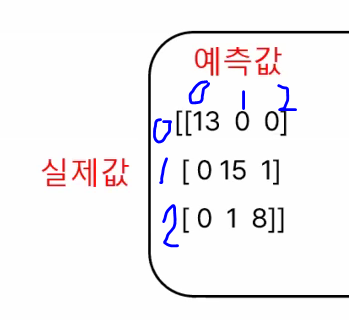

### 4) 분류 레포트 확인

In [20]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te,knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



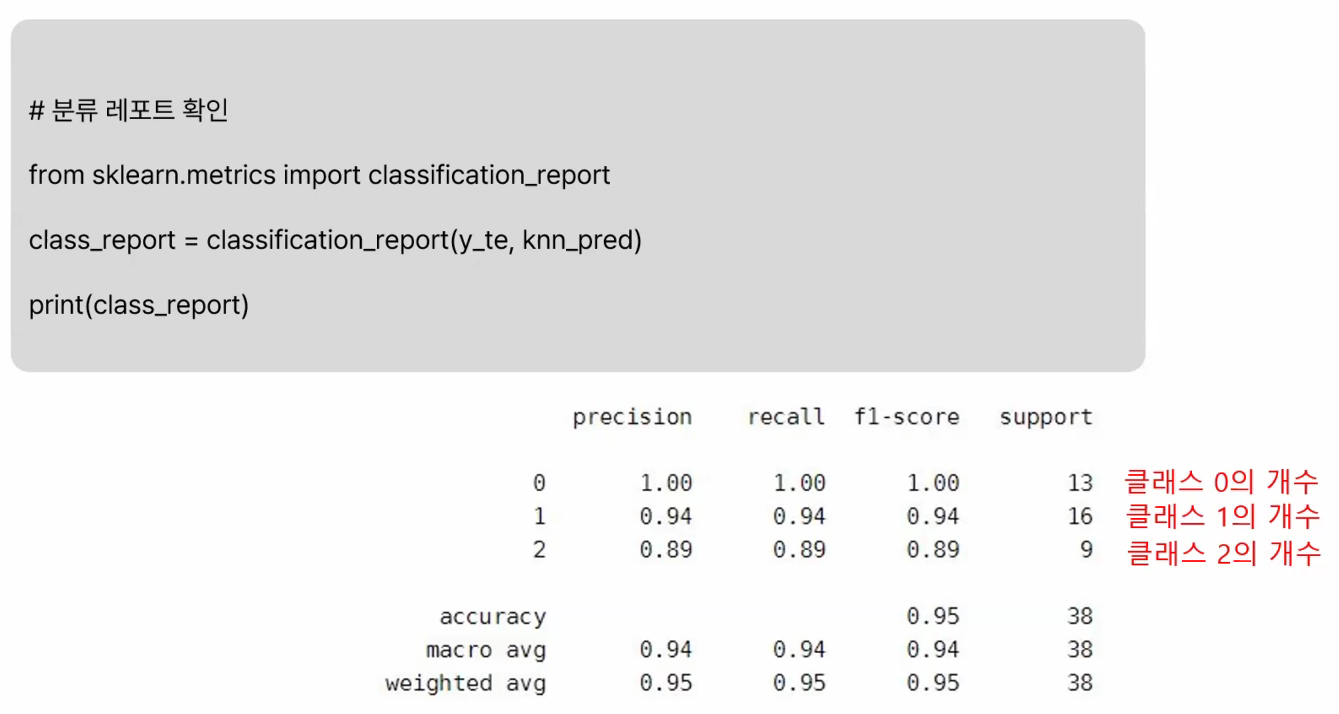

## 2. 선형회귀분석

In [21]:
import pandas as pd
df =pd.read_csv('boston_house_prices.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 1) 피처 & 타겟 분리,  Classification Or Regression 인지 확인  

In [22]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [23]:
X= df[features] # 피처
y =df['MEDV'] # 타겟

### 2. 트레이닝/테스트 데이터 분할

In [24]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)

### 3. 데이터 표준화

In [25]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te) 

### 4. 선형회귀분석 학습

In [26]:
from sklearn.linear_model import LinearRegression
clf_Ir = LinearRegression()
clf_Ir.fit(X_tn_std, y_tn)

LinearRegression()

### 5. 선형회귀분석 모형 추정 계수 확인 (w 값과 b값 구하기)

In [27]:
print(clf_Ir.coef_)

[ 1.03167652e-14 -1.11022302e-14  8.54871729e-15 -2.69229083e-15
  7.66053887e-15 -5.32907052e-15  8.54871729e-15 -1.23234756e-14
  1.04360964e-14  6.99440506e-15  4.88498131e-15 -1.55431223e-15
  1.36557432e-14  9.23624575e+00]


In [28]:
print(clf_Ir.intercept_)

22.60870712401056


### 6. 릿지 회귀분석(L2 제약식 적용)

In [29]:
from sklearn.linear_model import Ridge
clf_ridge = Ridge(alpha=1)
clf_ridge.fit(X_tn_std,y_tn)

Ridge(alpha=1)

### 7. 리쏘 회귀분석(L1 제약식 적용)

In [30]:
from sklearn.linear_model import Lasso
clf_lasso= Lasso(alpha=0.01)
clf_lasso.fit(X_tn_std,y_tn)

Lasso(alpha=0.01)

### 8. 엘라스틱넷

In [31]:
from sklearn.linear_model import ElasticNet
clf_elastic = ElasticNet(alpha=0.01, l1_ratio=0.01) 
clf_elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.01, l1_ratio=0.01)

### 9. 예측(평가방법)

In [32]:
pred_lr = clf_Ir.predict(X_te_std)  #아무것도 적용 x
pred_ridge = clf_ridge.predict(X_te_std) # 릿지 적용
pred_lasso = clf_lasso.predict(X_te_std) # 라쏘 적용
pred_elastic = clf_elastic.predict(X_te_std) # 엘라스틱넷 적용

### 10. 모형 평가-R제곱값

In [33]:
from sklearn.metrics import r2_score
print(r2_score(y_te, pred_lr))
print(r2_score(y_te, pred_ridge))
print(r2_score(y_te, pred_lasso))
print(r2_score(y_te, pred_elastic))

1.0
0.9999536702138659
0.9999988264680978
0.9994024749468843


### 11. 모형 평가-MSE

In [34]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_lr))
print(mean_squared_error(y_te, pred_ridge))
print(mean_squared_error(y_te, pred_lasso))
print(mean_squared_error(y_te, pred_elastic))

5.987764845787016e-27
0.0037850979126046094
9.587640099837105e-05
0.048817208539107586


- 모형평가 - R제곱값 : 0과 1사이에 있음 : 우리가 추정하고자 하는 (설명가능한 부분) = 0.63 (전체부분에서 설명가능부분이 63% -> 높으면 높을수록 좋음 !)
    - 설명 가능하지 않은 부분 (설명불가능한 부분, 오차, error)
- 모형평가 - MSD / 각 값들의 오차를 제곱핵서 더한값 (0부터 무한대 값을 가짐)
- 도메인에따라서 기준값이 결정됨 ! 

- CLASSIFICATION(분류문제) => 평가방법 : ACCURACY, PRECISION, RECALL 등등 사용
- CLSUTERING(군집문제) => 평가방법 : R2, MSE 등등 사용

## 3. 로지스틱 회귀분석

In [35]:
import pandas as pd
df = pd.read_csv('wine_data.csv')
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [40]:
# X, y 확인 및 결정(피처와 타겟)
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [41]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [42]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [43]:
# 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression
clf_logi_l2 = LogisticRegression(penalty='l2') # w에 대한 penalty 결정 : 없음 , l1, l2, 엘라스틱넷
clf_logi_l2.fit(X_tn_std, y_tn)

#penalty = l2 선택

LogisticRegression()

In [44]:
# 로지스틱 회귀분석 모형 추정 계수 ( 각 클래스(0, 1, 2)별 값)
print(clf_logi_l2.coef_)
print(clf_logi_l2.intercept_)

# coef : 피처 13개 * 클래스 개수 3개(0, 1, 2)
# intercept : 클래스 개수 * 3개(0, 1, 2)

[[ 0.69853977  0.25867826  0.39868195 -0.76815236 -0.00429211  0.18526119
   0.74915884 -0.12654939  0.10401364  0.17318889  0.13724279  0.68065574
   0.98907933]
 [-0.81533159 -0.47295284 -0.74058812  0.54948684 -0.08525548  0.01376966
   0.18741135  0.13017416  0.324744   -1.07084932  0.57591149  0.1276171
  -0.99183488]
 [ 0.11679181  0.21427458  0.34190617  0.21866552  0.08954759 -0.19903085
  -0.93657019 -0.00362477 -0.42875763  0.89766042 -0.71315428 -0.80827284
   0.00275554]]
[ 0.29606777  0.57687138 -0.87293914]


In [45]:
pred_logistic = clf_logi_l2.predict(X_te_std)
print(pred_logistic)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [46]:
pred_proba = clf_logi_l2.predict_proba(X_te_std)
print(pred_proba)

[[9.93360060e-01 4.92359807e-03 1.71634194e-03]
 [3.22076323e-04 2.77943948e-04 9.99399980e-01]
 [1.00535859e-02 9.89854907e-01 9.15071461e-05]
 [9.85578241e-01 1.15830075e-02 2.83875127e-03]
 [9.72825954e-02 8.94560998e-01 8.15640637e-03]
 [1.60778757e-01 8.37805552e-01 1.41569030e-03]
 [9.99185889e-01 2.82861666e-04 5.31249532e-04]
 [9.27747541e-04 6.79471537e-03 9.92277537e-01]
 [4.73077770e-03 9.94412333e-01 8.56889586e-04]
 [1.16783305e-03 9.96547896e-01 2.28427103e-03]
 [2.29360201e-02 1.70472078e-02 9.60016772e-01]
 [5.37945912e-04 2.05426668e-03 9.97407787e-01]
 [9.99868646e-01 4.18491948e-05 8.95049101e-05]
 [7.05474922e-02 9.29254258e-01 1.98249912e-04]
 [3.43785273e-03 1.00980993e-03 9.95552337e-01]
 [1.23126171e-04 9.99870752e-01 6.12188768e-06]
 [9.95131651e-01 3.26254700e-03 1.60580153e-03]
 [9.99969651e-01 5.43181185e-06 2.49174273e-05]
 [5.79978522e-03 7.64925188e-01 2.29275027e-01]
 [9.98986465e-01 9.25988748e-04 8.75463768e-05]
 [6.06195463e-02 9.39306550e-01 7.390404

In [47]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_logistic)
print(accuracy)


1.0


In [49]:
# 정밀도
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_logistic, average='macro')
print(precision)

1.0


In [51]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_logistic, average='macro')
print(recall)

1.0


In [50]:
# F1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_logistic, average='macro')
print(f1)

1.0


In [52]:
# confusion matrix 확인 
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_logistic)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [53]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_logistic)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 4. 나이브베이즈 

In [54]:
# 데이터 불러오기

import pandas as pd
df = pd.read_csv('wine_data.csv')
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [55]:
# X, y 확인 및 결정(피처와 타겟)

features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']

X = df[features]
y = df['class']

In [56]:
# 트레이닝/테스트 데이터 분할

from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)

In [57]:
# 데이터 표준화

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [58]:
# 나이브 베이즈 학습

from sklearn.naive_bayes import GaussianNB # Gaussian = 정규분포
clf_gnb = GaussianNB()
clf_gnb.fit(X_tn_std, y_tn)

GaussianNB()

In [59]:
# 예측

pred_gnb = clf_gnb.predict(X_te_std)
print(pred_gnb)

[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [60]:
# 정확도(accuracy)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_gnb)
print(accuracy)

0.9333333333333333


In [61]:
# 정밀도(precision)

from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_gnb, average='macro')
print(precision)

0.9259259259259259


In [62]:
# 리콜

from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_gnb, average='macro')
print(recall)

0.9523809523809524


In [63]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_gnb, average='macro')
print(f1)

0.9351432880844645


In [64]:
# confusion matrix 확인

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_gnb)
print(conf_matrix)

[[16  0  0]
 [ 2 18  1]
 [ 0  0  8]]


In [65]:
# 분류 레포트 확인

from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_gnb)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.95      0.94        45
weighted avg       0.94      0.93      0.93        45



## 5. 의사결정나무

In [66]:
#데이터 불러오기

import pandas as pd
df = pd.read_csv("wine_data.csv")
df


,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [67]:
# X, y 확인 및 결정(피처와 타겟)

features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']

In [68]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)


In [69]:
# 의사결정나무 학습
from sklearn import tree 
clf_tree = tree.DecisionTreeClassifier(random_state=0)
clf_tree.fit(X_tn_std, y_tn)


DecisionTreeClassifier(random_state=0)

In [70]:
#예측
pred_tree = clf_tree.predict(X_te_std)
print(pred_tree)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 1 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 1 0 1 1 1]


In [71]:
#정확도
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te,pred_tree)
print(accuracy)

0.9333333333333333


In [72]:
#정밀도
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_tree, average='macro')
print(precision)

0.9326599326599326


In [73]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_tree, average='macro')
print(recall)

0.9424603174603176


In [74]:
# f1 스코어
from sklearn.metrics import f1_score
f1 = f1_score(y_te, pred_tree, average='macro')
print(f1)

0.9349141206870346


In [75]:
# confusion matrix 확인
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_tree)
print(conf_matrix)

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [76]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_tree)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.91      0.95      0.93        21
           2       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



## 6. 서포트 벡터머신

In [183]:
#데이터 불러오기
import pandas as pd
df = pd.read_csv("wine_data.csv")
df


,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [184]:
#피쳐, 타겟 데이터 지정
features = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magesium', 'Phenols', 'Flavanoids', 
'Nonflavanoids', 'Proanthocyanins', 'Color','Hue', 'Dilution', 'Proline']
X = df[features]
y = df['class']


In [185]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X,y,random_state=0)


In [186]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [187]:
# 서포트벡터머신 학습
from sklearn import svm 
clf_svm_lr = svm.SVC(kernel='linear', random_state=0)
clf_svm_lr.fit(X_tn_std, y_tn)

SVC(kernel='linear', random_state=0)

In [188]:
# 예측
pred_svm = clf_svm_lr.predict(X_te_std)
print(pred_svm)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [189]:
# 정확도(accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_te, pred_svm)
print(accuracy)

1.0


In [190]:
# 정밀도(precision)
from sklearn.metrics import precision_score
precision = precision_score(y_te, pred_svm, average='macro')
print(precision)

1.0


In [191]:
# 리콜
from sklearn.metrics import recall_score
recall = recall_score(y_te, pred_svm, average='macro')
print(recall)

1.0


In [192]:
# confusion matrix 확인
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_te, pred_svm)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [193]:
# 분류 레포트 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_svm)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

